In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split ,  GridSearchCV
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

In [24]:
data = pd.read_csv('Cardiovascular_Disease_Dataset.csv')

In [25]:
data.isnull().sum()

patientid            0
age                  0
gender               0
chestpain            0
restingBP            0
serumcholestrol      0
fastingbloodsugar    0
restingrelectro      0
maxheartrate         0
exerciseangia        0
oldpeak              0
slope                0
noofmajorvessels     0
target               0
dtype: int64

In [26]:
data.duplicated().sum()

np.int64(0)

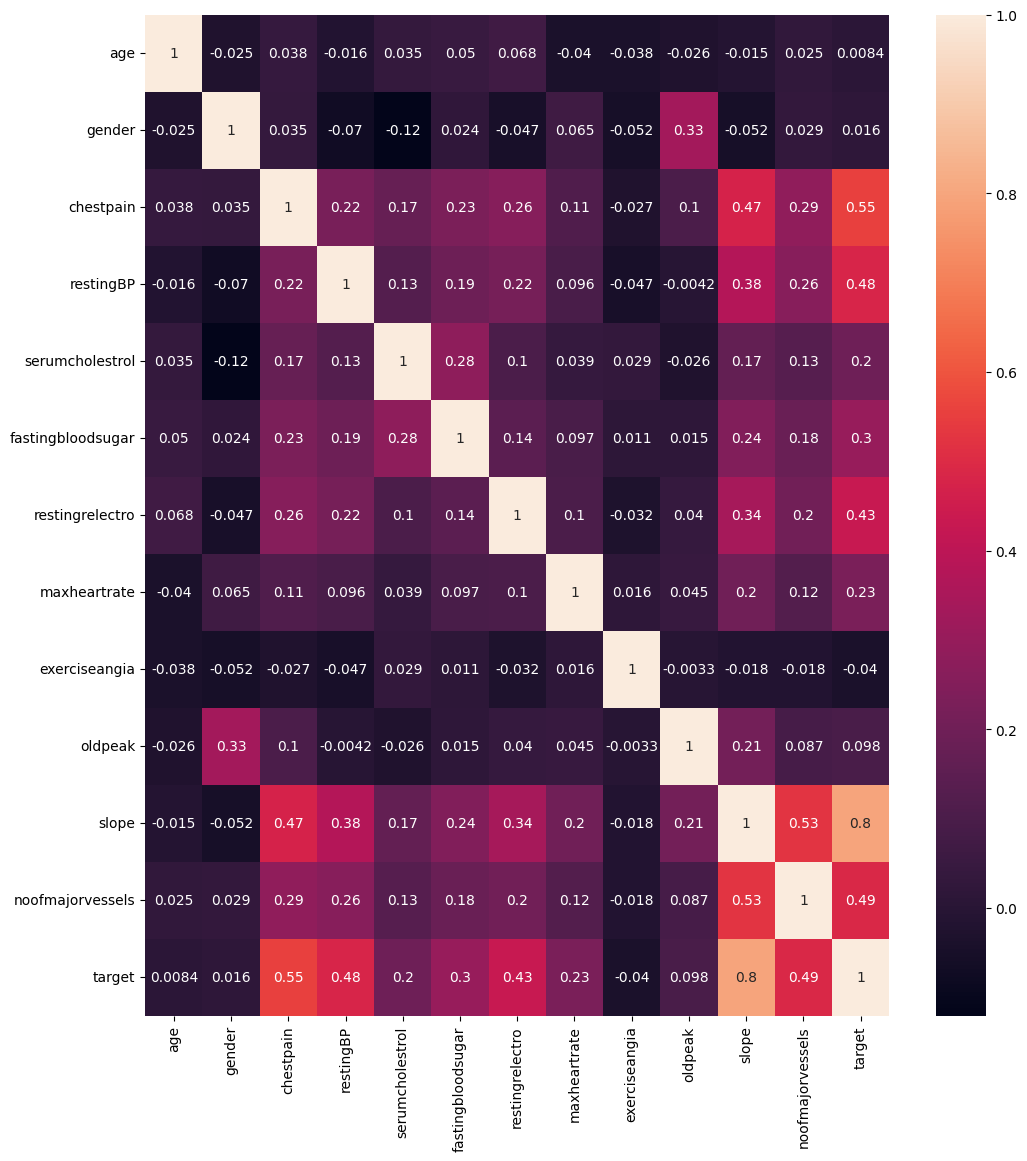

In [27]:
plt.figure(figsize=(12,13))
sns.heatmap(data.drop('patientid' , axis=1).corr() ,annot=True)
plt.show()

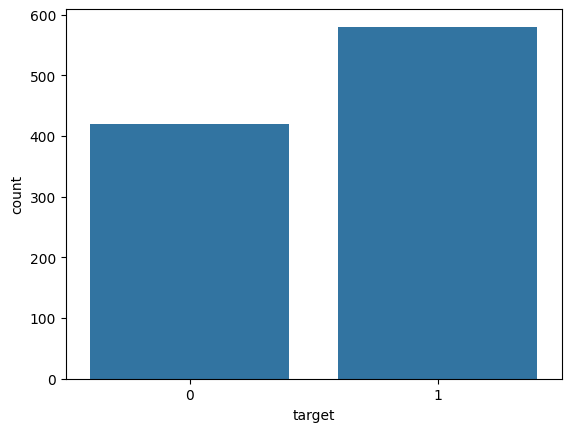

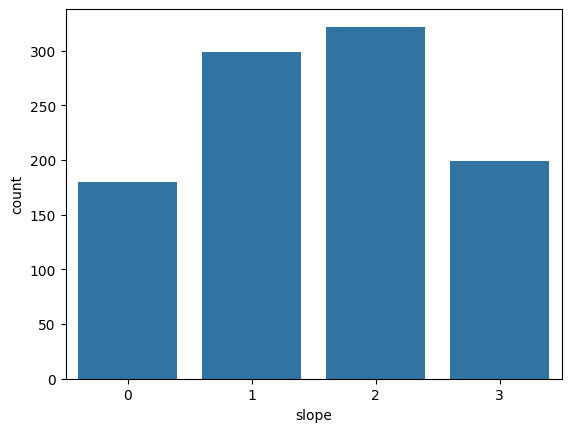

In [28]:
sns.countplot(data = data , x = "target")
plt.show()
sns.countplot(data = data , x = "slope")
plt.show()

In [29]:
data

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
0,103368,53,1,2,171,0,0,1,147,0,5.3,3,3,1
1,119250,40,1,0,94,229,0,1,115,0,3.7,1,1,0
2,119372,49,1,2,133,142,0,0,202,1,5.0,1,0,0
3,132514,43,1,0,138,295,1,1,153,0,3.2,2,2,1
4,146211,31,1,1,199,0,0,2,136,0,5.3,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,9949544,48,1,2,139,349,0,2,183,1,5.6,2,2,1
996,9953423,47,1,3,143,258,1,1,98,1,5.7,1,0,0
997,9965859,69,1,0,156,434,1,0,196,0,1.4,3,1,1
998,9988507,45,1,1,186,417,0,1,117,1,5.9,3,2,1


In [30]:
x = data.drop(['target' , 'patientid'] , axis=1)
y = data['target']

In [32]:
parameter = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Regularization type
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],    # Inverse of regularization strength
    'solver': ['lbfgs', 'liblinear', 'saga'],        # Optimization algorithms
    'max_iter': [100, 200, 500],                     # Iteration limit
    'l1_ratio': [0, 0.25, 0.5, 0.75, 1]              
}


model = LogisticRegression()
hyper = GridSearchCV(model , parameter , cv=5 , scoring='accuracy')

In [33]:
x_train , x_test , y_train , y_test = train_test_split(x , y , random_state=42 , test_size=0.2)

In [34]:
hyper.fit(x_train , y_train)

C:\Users\😎ThuTha😎\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\😎ThuTha😎\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https:/

,estimator,LogisticRegression()
,param_grid,"[{'C': [0.001, 0.01, ...], 'max_iter': [200, 500], 'penalty': ['l2'], 'solver': ['lbfgs', 'liblinear', ...]}, {'C': [0.001, 0.01, ...], 'max_iter': [200, 500], 'penalty': ['l1'], 'solver': ['liblinear', 'saga']}, ...]"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [35]:
y_test_model = hyper.predict(x_test)

In [29]:
confusion_matrix(y)

(np.int64(119), np.int64(117))

In [32]:
x_test

,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels
521,44,1,0,147,487,0,1,179,0,3.1,2,1
737,29,1,0,152,138,0,0,199,1,0.0,0,0
740,72,0,1,156,411,0,0,186,0,0.1,1,2
660,67,1,0,165,234,0,0,168,1,5.6,1,1
411,64,0,2,97,0,0,1,186,1,1.8,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
408,52,1,2,132,287,0,2,136,1,5.1,3,1
332,21,0,0,139,213,0,1,71,1,2.3,1,1
208,36,1,2,135,342,0,1,187,0,0.9,1,2
613,29,0,1,193,226,0,0,147,0,0.8,2,2
